In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv('survey lung cancer.csv')

In [3]:
df.shape

(309, 16)

In [4]:
df.nunique().sort_values()

GENDER                    2
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
AGE                      39
dtype: int64

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df["GENDER"] = LabelEncoder().fit_transform(df["GENDER"])
df["LUNG_CANCER"] = LabelEncoder().fit_transform(df["LUNG_CANCER"])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


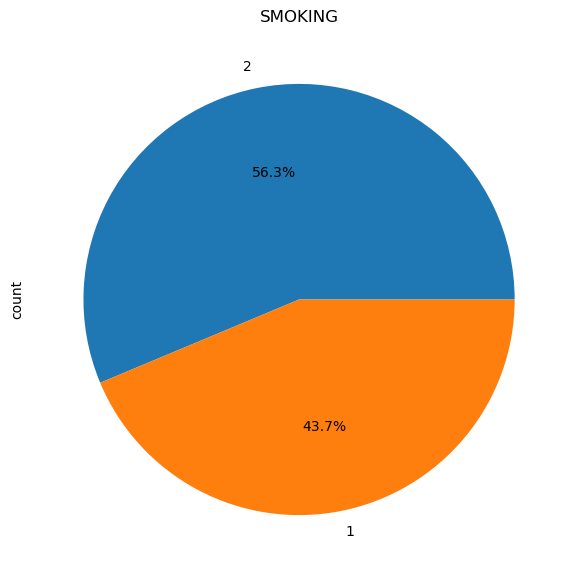

In [8]:
fig, axes = plt.subplots(figsize=(7, 7))
df['SMOKING'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('SMOKING')
plt.show()

In [9]:
df['SMOKING'].value_counts()

SMOKING
2    174
1    135
Name: count, dtype: int64

In [10]:
df["SMOKING"] = df['SMOKING'].replace({1: 0, 2: 1})

In [11]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

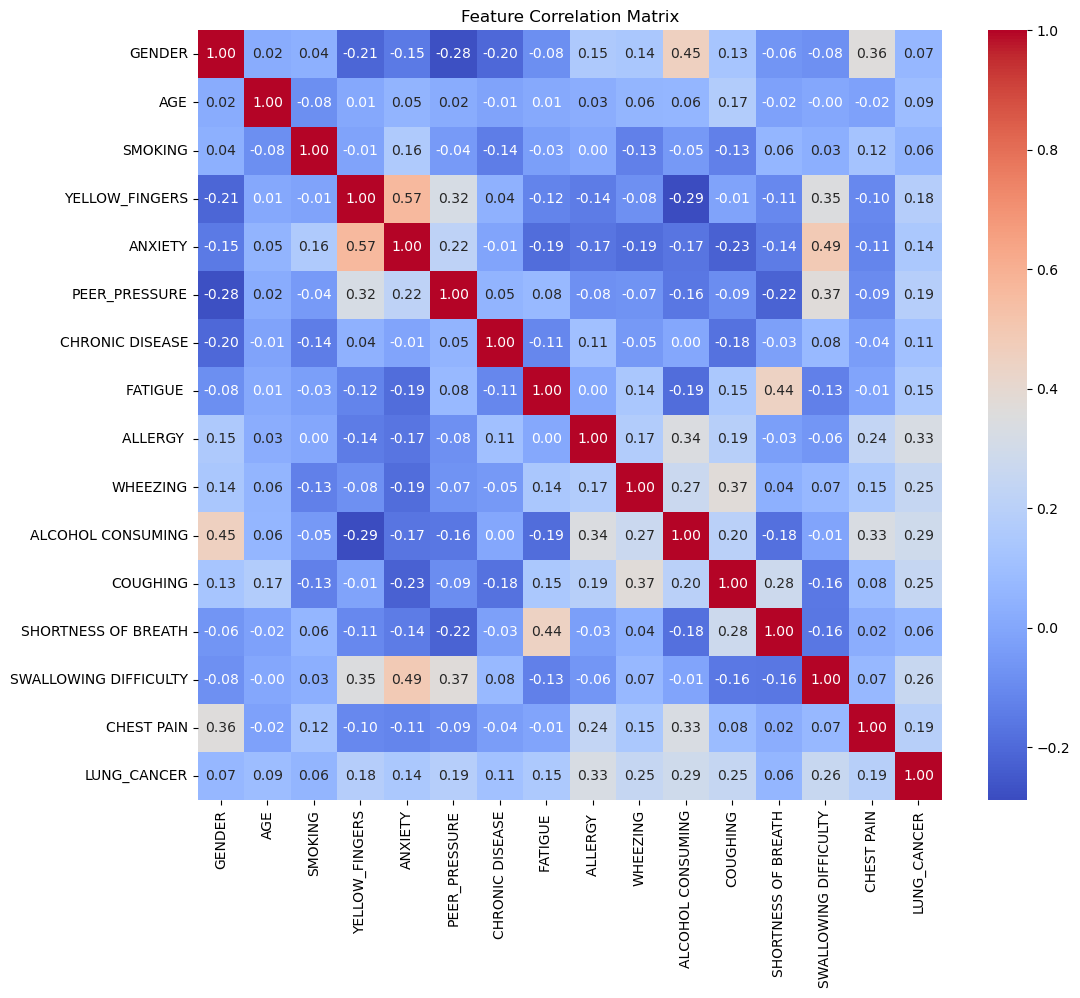

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train_valid, test = train_test_split(
    df,
    test_size=0.2,
    stratify=df["SMOKING"], 
    random_state=42
)

In [14]:
# train_valid.to_csv('cleaned.csv')
# test.to_csv("test.csv")

train_valid.shape

(247, 16)

In [15]:
test.shape

(62, 16)